In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm

import sys

## Path for Dataset
path = ''
sys.path.insert(0, path)

In [2]:
read = h5py.File(path + 'coincs.hdf5')
read

<HDF5 file "coincs.hdf5" (mode r)>

In [3]:
keys = read.keys()

for k in keys:
    print(k, read[k])

H1 <HDF5 group "/H1" (2 members)>
L1 <HDF5 group "/L1" (2 members)>
decimation_factor <HDF5 dataset "decimation_factor": shape (1089453,), type "<f8">
segments <HDF5 group "/segments" (1 members)>
stat <HDF5 dataset "stat": shape (1089453,), type "<f4">
template_id <HDF5 dataset "template_id": shape (1089453,), type "<i8">
timeslide_id <HDF5 dataset "timeslide_id": shape (1089453,), type "<i4">


In [4]:
H1 = read['H1']

keys = H1.keys()

for k in keys:
    print(k, H1[k])

time <HDF5 dataset "time": shape (1089453,), type "<f8">
trigger_id <HDF5 dataset "trigger_id": shape (1089453,), type "<i8">


In [5]:
write = h5py.File(path + 'Coinc_wf.hdf5', 'w')

htw = write.create_group('Htrig')
ltw = write.create_group('Ltrig')
statw = write.create_group('stat')

tids = np.array(read['template_id'])
Htrigs = np.array(read['H1']['time'])
Ltrigs = np.array(read['L1']['time'])
stat = np.array(read['stat'])
for i, z in zip(range(236), tqdm(range(236))):
    
    Ht = []
    Lt = []
    st = []
    for j in range(len(tids)):
        temp = tids[j]
        
        if temp == i:
            Ht.append(Htrigs[j])
            Lt.append(Ltrigs[j])
            st.append(stat[j])
    
    dset = htw.create_dataset(str(i), data=np.array(Ht))
    dset = ltw.create_dataset(str(i), data=np.array(Lt))
    dset = statw.create_dataset(str(i), data=np.array(st))
            
write.close()

100%|████████████████████████████████████████▊| 235/236 [00:42<00:00,  5.50it/s]


4.9508576 13.595966 5.7077193 0.49645683


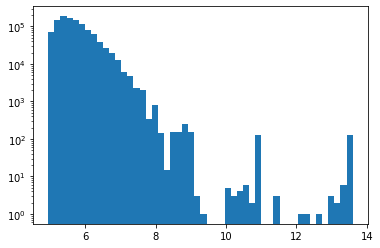

In [6]:
plt.hist(stat, bins=50)
plt.yscale('log')
print(min(stat), max(stat), np.mean(stat), np.std(stat))